# ZMYM3
[X-linked intellectual developmental disorder-112 (XLID112)](https://omim.org/entry/301111) is caused by hemizygous or heterozygous mutation in the ZMYM3 gene.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.2


### ZMYM3
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ZMYM3.

In [2]:
gene_symbol = 'ZMYM3'
mane_tx_id = 'NM_201599.3'
mane_protein_id = 'NP_963893.1' # zinc finger MYM-type protein 3 isoform 1 [Homo sapiens]

In [3]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.23") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
print(f'Loaded {len(phenopackets)} phenopackets')

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Loaded 33 phenopackets
Individuals Processed: 100%|██████████| 33/33 [00:46<00:00,  1.42s/ individuals]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #9
    individual
     warnings:
     ·ontology_class of the time_at_last_encounter field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)
     ·ontology_class of the time_of_death field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
29,Delayed speech and language development
21,Motor delay
20,Intellectual disability
15,Autistic behavior
8,Hypospadias
8,Cupped ear
7,Short stature
6,Sleep abnormality
6,Deeply set eye
6,Microcephaly


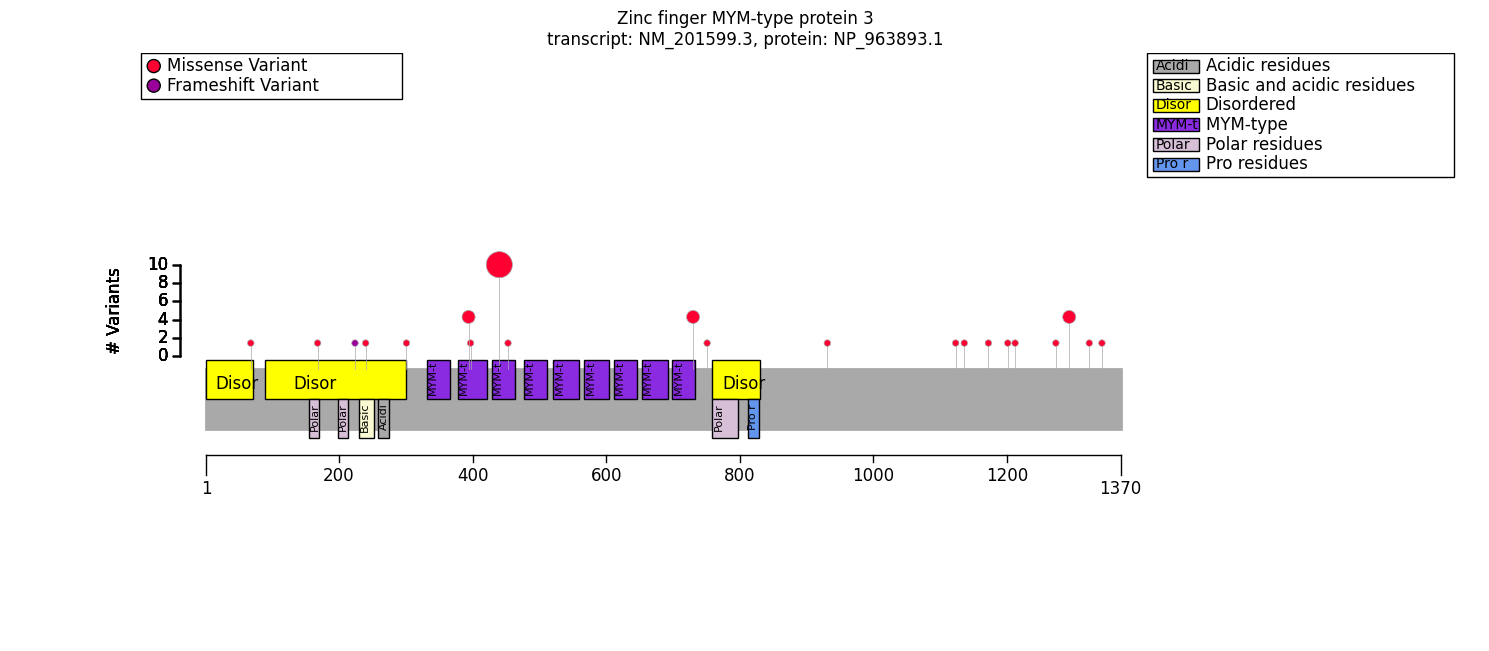

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

zmym3_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
zmym3_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model.genome import Region
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate import protein_region
from gpsea.analysis.clf import monoallelic_classifier

n_term = protein_region(region=Region(1, 600), tx_id=mane_tx_id)
nterm_clf = monoallelic_classifier(
    a_predicate=n_term,
    b_predicate=~n_term,
    a_label="N term",
    b_label="other"
)
nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=nterm_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(nterm_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,58
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,83
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,145


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group                                       N term          other  \
                                                    Count Percent  Count   
Hypospadias [HP:0000047]                             8/19     42%   0/13   
Motor delay [HP:0001270]                            13/16     81%   8/13   
Autistic behavior [HP:0000729]                       9/13     69%   6/11   
Intellectual disability [HP:0001249]                14/16     88%   9/10   
Neurodevelopmental abnormality [HP:0012759]         19/19    100%  13/13   
Atypical behavior [HP:0000708]                      14/16     88%  10/11   
Neurodevelopmental delay [HP:0012758]               16/16    100%  13/13   
Delayed speech and language development [HP:000...  16/16    100%  13/13   
Abnormal communication [HP:0034434]                 16/16    100%  13/13   
Diagnostic behavioral phenotype [HP:0025783]         9/11     82%    6/7   

Allele group                                                                   \
                                                   Percent Corrected p values   
Hypospadias [HP:0000047]                                0%           0.104079   
Motor delay [HP:0001270]                               62%           1.000000   
Autistic behavior [HP:0000729]                         55%           1.000000   
Intellectual disability [HP:0001249]                   90%           1.000000   
Neurodevelopmental abnormality [HP:0012759]           100%           1.000000   
Atypical behavior [HP:0000708]                         91%           1.000000   
Neurodevelopmental delay [HP:0012758]                 100%           1.000000   
Delayed speech and language development [HP:000...    100%           1.000000   
Abnormal communication [HP:0034434]                   100%           1.000000   
Diagnostic behavioral phenotype [HP:0025783]           86%           1.000000   

Allele group                                                  
                                                    p values  
Hypospadias [HP:0000047]                            0.010408  
Motor delay [HP:0001270]                            0.405764  
Autistic behavior [HP:0000729]                      0.675175  
Intellectual disability [HP:0001249]                1.000000  
Neurodevelopmental abnormality [HP:0012759]         1.000000  
Atypical behavior [HP:0000708]                      1.000000  
Neurodevelopmental delay [HP:0012758]               1.000000  
Delayed speech and language development [HP:000...  1.000000  
Abnormal communication [HP:0034434]                 1.000000  
Diagnostic behavioral phenotype [HP:0025783]        1.000000

In [10]:
from gpsea.analysis.predicate import variant_key

r441w = variant_key("X_71249610_71249610_G_A") #c.1321C>T	p.Arg441Trp
r441q = variant_key("X_71249609_71249609_C_T") #c.1322G>A	p.Arg441Gln	
r441 = r441w | r441q

r441_clf = monoallelic_classifier(
    a_predicate=r441,
    b_predicate=~r441,
    a_label="R441",
    b_label="other"
)
r441_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r441_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=r441_result)

Allele group                                         R441          other  \
                                                    Count Percent  Count   
Cupped ear [HP:0000378]                              7/10     70%   1/23   
Abnormal aortic valve cusp morphology [HP:0031567]    4/8     50%   0/22   
Hypospadias [HP:0000047]                             6/10     60%   2/22   
Bicuspid aortic valve [HP:0001647]                   4/10     40%   0/22   
Enuresis [HP:0000805]                                 3/6     50%   1/22   
Short stature [HP:0004322]                            3/4     75%   4/23   
Autistic behavior [HP:0000729]                        4/4    100%  11/20   
Intellectual disability [HP:0001249]                10/10    100%  13/16   
Atypical behavior [HP:0000708]                        8/8    100%  16/19   
Motor delay [HP:0001270]                              6/7     86%  15/22   
Neurodevelopmental abnormality [HP:0012759]         10/10    100%  22/22   
Neurodevelopmental delay [HP:0012758]                 7/7    100%  22/22   
Delayed speech and language development [HP:000...    7/7    100%  22/22   
Abnormal communication [HP:0034434]                   7/7    100%  22/22   
Diagnostic behavioral phenotype [HP:0025783]          4/4    100%  11/14   

Allele group                                                                   \
                                                   Percent Corrected p values   
Cupped ear [HP:0000378]                                 4%           0.003030   
Abnormal aortic valve cusp morphology [HP:0031567]      0%           0.019157   
Hypospadias [HP:0000047]                                9%           0.021899   
Bicuspid aortic valve [HP:0001647]                      0%           0.021899   
Enuresis [HP:0000805]                                   5%           0.066667   
Short stature [HP:0004322]                             17%           0.104701   
Autistic behavior [HP:0000729]                         55%           0.490385   
Intellectual disability [HP:0001249]                   81%           0.490385   
Atypical behavior [HP:0000708]                         84%           0.887179   
Motor delay [HP:0001270]                               68%           0.952416   
Neurodevelopmental abnormality [HP:0012759]           100%           1.000000   
Neurodevelopmental delay [HP:0012758]                 100%           1.000000   
Delayed speech and language development [HP:000...    100%           1.000000   
Abnormal communication [HP:0034434]                   100%           1.000000   
Diagnostic behavioral phenotype [HP:0025783]           79%           1.000000   

Allele group                                                  
                                                    p values  
Cupped ear [HP:0000378]                             0.000202  
Abnormal aortic valve cusp morphology [HP:0031567]  0.002554  
Hypospadias [HP:0000047]                            0.004867  
Bicuspid aortic valve [HP:0001647]                  0.005840  
Enuresis [HP:0000805]                               0.022222  
Short stature [HP:0004322]                          0.041880  
Autistic behavior [HP:0000729]                      0.258893  
Intellectual disability [HP:0001249]                0.261538  
Atypical behavior [HP:0000708]                      0.532308  
Motor delay [HP:0001270]                            0.634944  
Neurodevelopmental abnormality [HP:0012759]         1.000000  
Neurodevelopmental delay [HP:0012758]               1.000000  
Delayed speech and language development [HP:000...  1.000000  
Abnormal communication [HP:0034434]                 1.000000  
Diagnostic behavioral phenotype [HP:0025783]        1.000000

# Summary

In [11]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
    GPAnalysisResultSummary.from_mono(
        result=nterm_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=r441_result,
    ),
)

caption = ""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [12]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [13]:
summarizer.process_latex(report=report, protein_fig=zmym3_fig)

Figure saved to ../../supplement/img/ZMYM3_protein_diagram-draft.pdf
Output to ../../supplement/tex/ZMYM3_summary_draft.tex
